# سوال چهارم

تصویر paper را در ورودی خوانده فیلترهای تیزکننده به آن اعمال کنید. ازسوی دیگر به تصویر اصلی فیلتر محو کننده اعمال 
کنید تصویر حاصل شده را از تصویر اصلی کم کرده و حاصل را به تصویر اصلی اضافه کنید. خروجی دو فرآیند گفته شده را با هم 
مقایسه کنید و گزارش دهید.
به تصویر kodim05 فیلتر sobel در راستای طول و عرض اعمال کنید. تصاویر حاصل را تجمیع کنید. همین فرآیند را بوسیله 
فیلتر F که در یک بعد اعمال می شود و مقادیر آن برای شما مشخص شده است را در دو راستای طول و عرض به تصویر اعمال 
کنید. همانند فیلتر sobel دو خروجی که در یکی لبه ها در راستای x و دیگری لبه ها در راستای yرا مشخص می کند خواهید 
داشت. خروجی ها را باهم تجمیع کنید.

In [1]:
import cv2
import numpy
import matplotlib.pyplot as plt

توابع مورد نیاز مثل اعمال فیلتر median و گوسی را تعریف میکنیم.

In [2]:
def ApplyMedianFilter(size:int , img):
   image = cv2.medianBlur(img , size)
   return image

In [3]:
def ApplyGaussianFilter(size:int , img):
    image = cv2.GaussianBlur(img , (size , size) , 0)

    return image

در این قسمت با روش فیلتر لاپلاسین و کم کردن تصویر محو شده و روش LOG روی برگه تغییرات انجام میدهیم و در اخر تصویر حاصل از این سه روش و روش اصلی را باهم مقایسه میکنیم

در ابتدا تصویر اصلی را میخوانیم

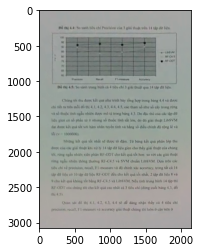

In [4]:
paperImage = cv2.imread("../paper.png")

plt.imshow(paperImage , cmap = "gray")
plt.show()

حال فیلتر لاپلاسین را بر روی آن اعمال میکنیم

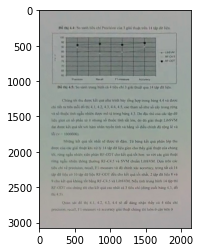

In [5]:
# generating laplasian filter
laplasianFilter = numpy.array([[-1,-1,-1] , [-1,9,-1],[-1,-1,-1]] , numpy.float32)

# appling filter on image
filterpaper = cv2.filter2D(paperImage , -1 , laplasianFilter)

# showing image
plt.imshow(filterpaper , cmap = "gray")
plt.show()

در مرحله بعد به سراغ ایجاد تصویر محو شده و سپس کم کردن آن از تصویر اصلی و سپس اضافه کردن تصویر کم شده به تصویر اصلی میرویم

Text(0.5, 1.0, 'sharped paper')

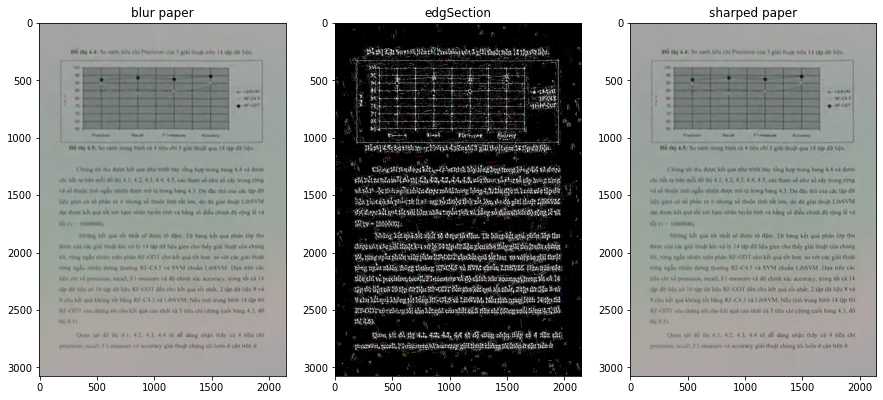

In [6]:
# bluring paper
blurPaper = ApplyMedianFilter(7,paperImage)
# minus blur paper from main paper 
edgeSection = paperImage - blurPaper
# adding the edgeSection to main paper
sharpedPaper = paperImage + edgeSection

fig , subplot = plt.subplots(1,3,figsize=(15 , 15))
subplot[0].imshow(blurPaper , cmap = "gray")
subplot[0].set_title("blur paper")

subplot[1].imshow(edgeSection , cmap = "gray")
subplot[1].set_title("edgSection")

subplot[2].imshow(sharpedPaper , cmap = "gray")
subplot[2].set_title("sharped paper")

حال روش LOG را در دستور کار قرار میدهیم. در این روش ابتدا فیلتر گوسی را بر روی برگه اعمال میکنیم و سپس فیلتر لاپلاسین را بر روی تصویر حاصل اعمال میکنیم.

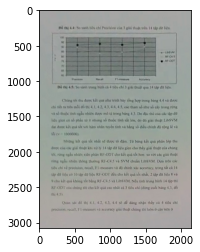

In [7]:
gaussPaper = ApplyGaussianFilter(3 , paperImage)
Logpaper = cv2.filter2D(gaussPaper , -1, laplasianFilter)

plt.imshow(Logpaper , cmap = "gray")
plt.show()

# نتیجه گیری

حال با کنار هم قرار دادن این نتایج آن ها را بررسی میکنیم

Text(0.5, 1.0, 'LOG')

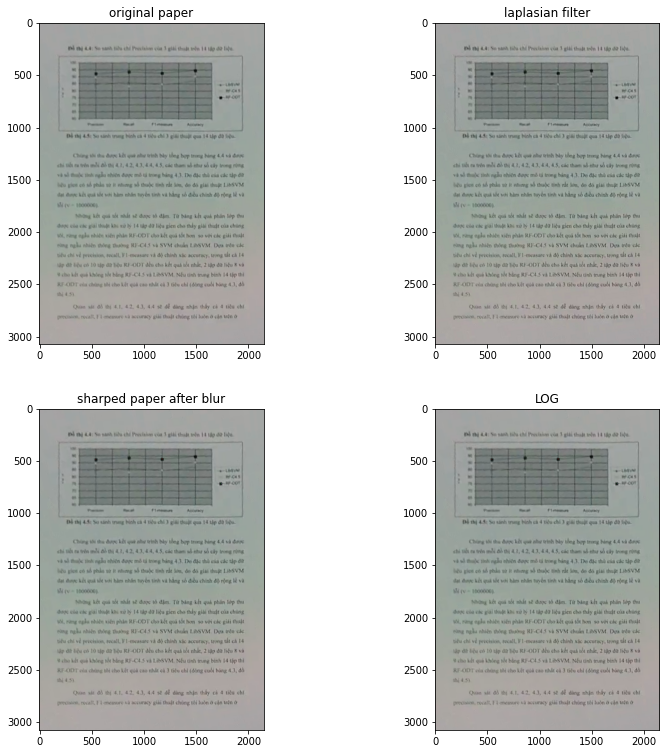

In [8]:
fig , subplot = plt.subplots(2,2,figsize=(13 , 13))

subplot[0][0].imshow(paperImage , cmap = "gray")
subplot[0][0].set_title("original paper")

subplot[0][1].imshow(filterpaper , cmap = "gray")
subplot[0][1].set_title("laplasian filter")

subplot[1][0].imshow(sharpedPaper , cmap = "gray")
subplot[1][0].set_title("sharped paper after blur")

subplot[1][1].imshow(sharpedPaper , cmap = "gray")
subplot[1][1].set_title("LOG")

با توجه به تصاویر میتوان به یکسری از تفاوت ها میان نتایج حاصله پی برد، البته در جوپیتر این تفاوت ها خیلی محسوس نیستند اما هنگامی که این کد ها را در ide میزنیم تفاوت ها محسوس تر هستند.
تصویر اصلی خوانایی کافی را ندارد(تصویر بالا سمت چپ) اما زمانی که فیلتر لاپلاسین بر آن اعمال میشود خوانایی آن بالاتر میرود ولی نویز های موجود در تصویر نمایان تر میشوند(تصویر بالا سمت راست) و این زیاد جالب نیست. برای رفع این مشکل قبل از اعمال فیلتر لاپلاسین یک فیلتر گوسی بر روی آن اعمال میکنند و سپس فیلتر لاپلاسین را اعمال میکنند، در این تصویر خوانایی نسب به تصویر بدون فیلتر گوسی پایین تر است اما نویز ها در آن محسوس نیستند(تصویر پایین سمت راست). 
تصویر پایین سمت چپ هم از روش بلور کردن تصویر و سپس کم کردن آن از تصویر اصلی و سپس جمع مقدار حاصله با تصویر اصلی است، در این روش تصویر کمی خواناتر میشود و نویز ها هم خیلی محسوس نیستند. در کل فکر میکنم بهترین روش برای داشتن بیشترین خوانایی از تصویر اصلی، تغییر آن با استفاده از فیلتر لاپلاسین هست.

# بخش دوم 

قبل از شروع مراحل کار، ابتدا تابعی تعریف میکنیم برای تجمیع دو تصویر طبق فرمول داده شده در صورت سوال. دلیل اینکه تصاویر را ابتدا به int 32 تبدیل میکنیم این است که چون قرار است درایه ها به توان دو برسند ولی به دلیل محدودیت تایپ آن ها نمیتوانند بزرگتر از 255 بشوند و در نتیجه مقدار جذر آن ها هم کوچکتر از مقدار واقعی میشود. به همین دلیل تصویر بدرستی تجمیع نمیشود. البته میتوانستیم بدون این تابع و فقط با جمع کردن به نتیجه دلخواه برسیم، اما چون در صورت سوال این فرمول وجود داشت از این فرمول استفاده میکنیم.

In [9]:
def aggregation(firstImage , secondImage):
    firstImage = firstImage.astype(numpy.uint32)
    secondImage = secondImage.astype(numpy.uint32)
    return numpy.sqrt((firstImage ** 2) + (secondImage ** 2)).astype(numpy.uint8)

در این روش ابتدا فیلتر sobelx و sobelY را اعمال میکنیم و سپس فیلتر F را در دو جهت x و y  اعمال میکنیم و پس از تجمیع با نشان دادن نتایج تفاوت آن ها را بررسی میکنیم

ابتدا تصویر اصلی را میخوانیم

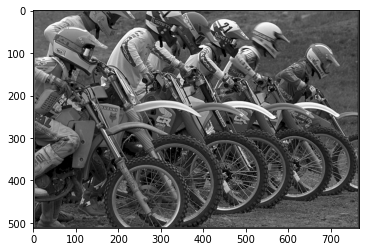

In [10]:
kodim05 = cv2.imread("../kodim05.png" , cv2.IMREAD_GRAYSCALE)

plt.imshow(kodim05 , cmap = "gray")
plt.show()

حال به سراغ فیلتر sobel میرویم

Text(0.5, 1.0, 'sobel')

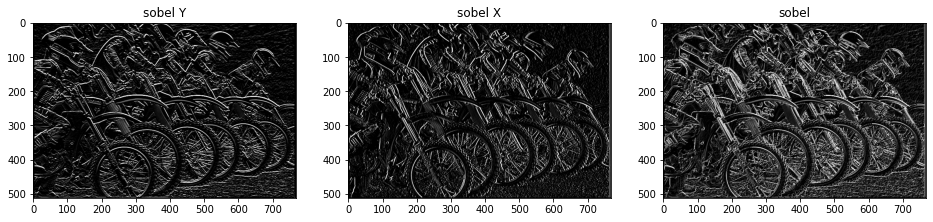

In [11]:
# generating sobel filter in x and y side
sobelY = numpy.array([[-1 , -2 , -1] , [0 , 0 , 0] , [1 , 2 , 1]] , numpy.float32)
sobelX = numpy.array([[-1 , 0 , 1] , [-2 , 0 , 2] , [-1 , 0 , 1]] , numpy.float32)

# calculating sobel Y
kodimYSobelFilter = cv2.filter2D(kodim05 , -1 , sobelY)
# calculating sobel X
kodimXSobelFilter = cv2.filter2D(kodim05 , -1 , sobelX)
# plus sobel x and sobel Y images
kodimSobelFilter = aggregation(kodimXSobelFilter , kodimYSobelFilter)

# showing images
fig , subplot = plt.subplots(1,3,figsize=(16 , 10))

subplot[0].imshow(kodimYSobelFilter , cmap = "gray")
subplot[0].set_title("sobel Y")

subplot[1].imshow(kodimXSobelFilter , cmap = "gray")
subplot[1].set_title("sobel X")

subplot[2].imshow(kodimSobelFilter , cmap = "gray")
subplot[2].set_title("sobel")

در این مرحله به سراغ فیلتر F میرویم

Text(0.5, 1.0, 'F')

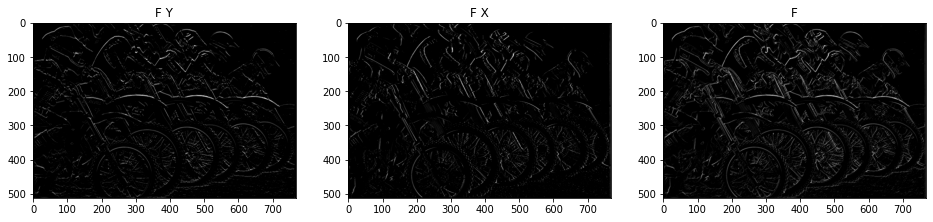

In [12]:
# generating Filters
FX = numpy.array([[-0.0052625, -0.0173466, -0.0427401, -0.0768961,-0.957739, -0.0696751, 0 ,
     0.6696751, 0.0957739, 0.0768961, 0.0427401, 0.0173466, 0.0052625]] , numpy.float32)

FY = numpy.array([[-0.0052625], [-0.0173466], [-0.0427401], [-0.0768961],[-0.957739], [-0.0696751], [0] ,
     [0.6696751], [0.0957739], [0.0768961], [0.0427401], [0.0173466], [0.0052625]] , numpy.float32)

# calculating F Y
kodimYFFilter = cv2.filter2D(kodim05 , -1 , FY)

# calculating F X
kodimXFFilter = cv2.filter2D(kodim05 , -1 , FX)

# plus F X and F Y
kodimFFilter = aggregation(kodimXFFilter , kodimYFFilter)

# showing images
fig , subplot = plt.subplots(1,3,figsize=(16 , 10))

subplot[0].imshow(kodimYFFilter , cmap = "gray")
subplot[0].set_title("F Y")

subplot[1].imshow(kodimXFFilter , cmap = "gray")
subplot[1].set_title("F X")

subplot[2].imshow(kodimFFilter , cmap = "gray")
subplot[2].set_title("F")

# نتیجه گیری

با توجه به تصاویر بدست امده از فیلترهای sobel و F میتوان به این نتیجه رسید که فیلتر sobel به جزییات و نویز های تصویر حساس تر هست و هر اتفاقی را ثبت میکند اما در فیلتر F به این شکل نیست، و این فیلتر بیشتر به کلیات و ساختار کلی آن توجه میکند و زیاد به جزییات و نویز های تصویر توجهی ندارد. همانطور که در تصویر ها میبینید. تصویر های مربوط به فیلتر F تیره تر هستند و فقط به کلیات و ساختار کلی توجه کردند ولی در تصاویر بدست امده از فیلتر sobel میبینیم که جزییات بسیاری ثبت شده است.
پس شاید بتوان گفت در تصاویر که نویز کمی دارند فیلتر sobel بدلیل پرداختن به جزییات دید بهتری ار تصویر به ما میدهد ولی در تصاویر نویزی به نظر فیلتر F کارا تر میباشد.